### Student Information
Name: 郭冠廷

Student ID: 114062630

GitHub ID: 106442351

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [1]:
### Begin Assignment Here
# test code for environment setup
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt') # download the NLTK datasets
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
# If you get "ModuleNotFoundError: No module named 'PAMI'"
# run the following in a new Jupyter cell:
# !pip3 install PAMI
import PAMI
import umap

#categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
#twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\A2282\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

In [3]:
record = pd.read_csv("newdataset/Reddit-stock-sentiment.csv")


In [4]:
#exercise 1
record.head(3) 

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0


In [5]:
X = record[['subreddit', 'text','sentiment','label']] #selecting relevant columns
categories = X['subreddit'].unique().tolist() #getting unique categories
category_mapping = {name: idx for idx, name in enumerate(categories)}
X['category'] = X['subreddit'].map(category_mapping) #mapping categories to numerical values


C:\Users\A2282\AppData\Local\Temp\ipykernel_19516\424163606.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['category'] = X['subreddit'].map(category_mapping) #mapping categories to numerical values


In [6]:
#exercise 2
X[:10:-1][["text","subreddit","category"]]

,text,subreddit,category
846,![img](emote|t5_2th52|31224),wallstreetbets,0
845,i sold my puts so i expect cheeto to declare w...,wallstreetbets,0
844,"Upgrades, Downgrades\r\n\r\n [Stock Analyst Re...",stockstobuytoday,2
843,Where can I read this?,StockMarket,1
842,Invest now it is going to shoot up tomorrow,stockstobuytoday,2
...,...,...,...
15,Disgusting tactics,stocks,3
14,USA begging China to call them,stocks,3
13,"\r\nI’ve been doing pretty good with this, but...",stocks,3
12,"Honestly let the economy burn, maybe people wi...",stocks,3


In [7]:
#exercise 3
X[X['subreddit']=='stocks'][::10][0:5]

,subreddit,text,sentiment,label,category
6,stocks,Trump will respond to china increasing their t...,-1.0,-1.0,3
20,stocks,Nooo dont go down its smug bull day,0.0,-1.0,3
49,stocks,And you are? \r\n\r\nMarket. Mr. Market.,0.0,0.0,3
75,stocks,"""New to investing"" but almost $50k port. Ok th...",1.0,0.0,3
118,stocks,Yikes...\r\n\r\n\r\nThis shitshow continually ...,-1.0,1.0,3


In [8]:
import helpers.data_mining_helpers as dmh
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,subreddit,text,sentiment,label,category
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0,0


In [9]:
#exercise 4
X.isnull().apply(lambda x: dmh.check_missing_values(x),axis=1)

0      (The amoung of missing records is: , 0)
1      (The amoung of missing records is: , 0)
2      (The amoung of missing records is: , 0)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 0)
                        ...                   
842    (The amoung of missing records is: , 0)
843    (The amoung of missing records is: , 0)
844    (The amoung of missing records is: , 0)
845    (The amoung of missing records is: , 0)
846    (The amoung of missing records is: , 0)
Length: 847, dtype: object

subreddit
stocks              162
StockMarket         134
stockstobuytoday    116
wallstreetbets       88
Name: count, dtype: int64


<Axes: title={'center': 'Subreddit distribution'}, xlabel='subreddit'>

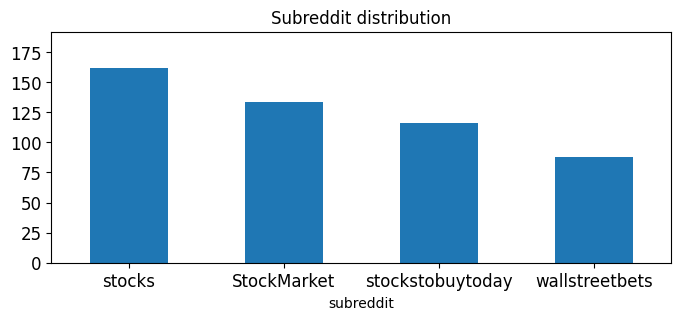

In [10]:
#exercise 7
X_sample = X.sample(n=500) 
print(X_sample.subreddit.value_counts())
X_sample.subreddit.value_counts().plot(kind = 'bar',
                                           title = 'Subreddit distribution',
                                           ylim = [0, X_sample.subreddit.value_counts().max()+30], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

<Axes: title={'center': 'Subreddit distribution: X vs X_sample'}, xlabel='subreddit'>

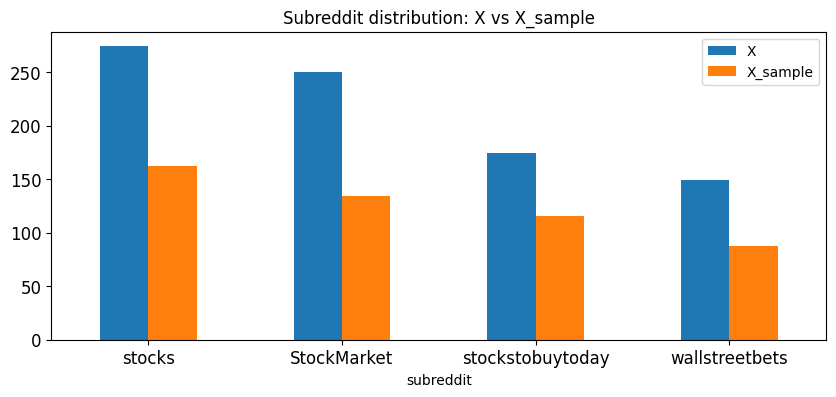

In [11]:
#exercise 8
counts_df = pd.DataFrame({
    "X": X.subreddit.value_counts(),
    "X_sample": X_sample.subreddit.value_counts()
}).astype(int)
counts_df.plot(kind="bar",
               figsize=(10,4),
               rot=0,
               fontsize=12,
               title="Subreddit distribution: X vs X_sample")

In [12]:
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
analyze = count_vect.build_analyzer()
analyze("I am craving for a hawaiian pizza right now")

C:\Users\A2282\AppData\Local\Temp\ipykernel_19516\2539428698.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))


['am', 'craving', 'for', 'hawaiian', 'pizza', 'right', 'now']

In [13]:
#exercise 9
analyze(X['text'][0])

['calls', 'on', 'retards']

In [14]:
X_counts[0:5, 0:100].toarray()


array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [15]:
count_vect.get_feature_names_out()[0:1]
#np.where(X_counts[3, 0:100].toarray()>0)[1][0]

array(['00'], dtype=object)

In [16]:
#exercise 10
count_vect.get_feature_names_out()[np.where(X_counts[3, 0:100].toarray()>0)[1][0]]



'116'

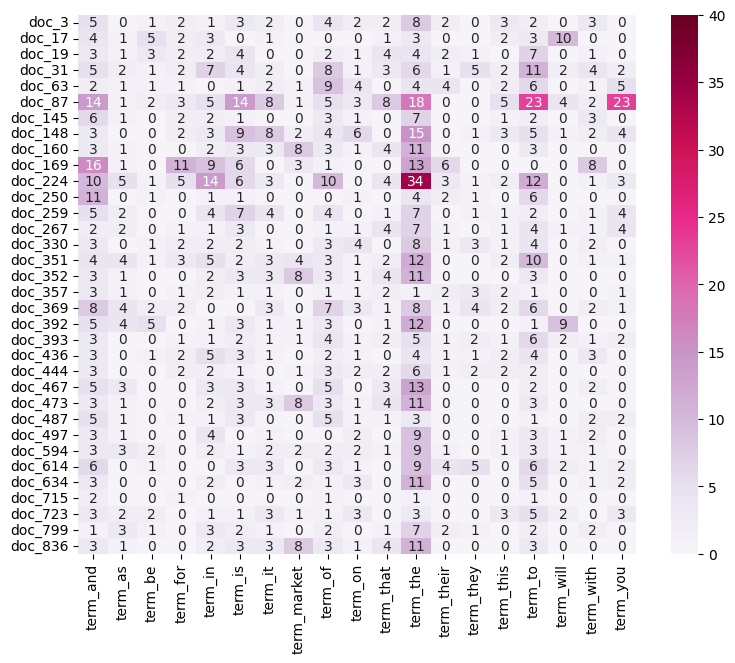

In [17]:
#exercise 11
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

doc_lengths = np.array(X_counts.sum(axis=1)).ravel()
min_len = 100
mask_docs = doc_lengths >= min_len
plot_z = X_counts[mask_docs, :]

term_freqs = np.array(plot_z.sum(axis=0)).ravel()
min_freq = 30
mask_terms = term_freqs >= min_freq
plot_z = plot_z[:, mask_terms].toarray()




# 過濾詞彙
terms = np.array(count_vect.get_feature_names_out())
terms = terms[mask_terms]  # 更新後的詞彙表
plot_x = ["term_"+str(i) for i in terms]
plot_y = ["doc_" + str(i) for i, keep in zip(X.index, mask_docs) if keep]
len(X.index) == len(mask_docs)
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
               cmap="PuRd",
               vmin=0, vmax=40, annot=True, fmt="d")

In [18]:
#exercise 12
term_freqs = np.array(X_counts.sum(axis=0)).ravel()
min_freq = 0
mask_terms = term_freqs >= min_freq
terms = np.array(count_vect.get_feature_names_out())
terms = terms[mask_terms]
term_freq = np.asarray(X_counts.sum(axis=0))[0][np.where(mask_terms)[0]]
import plotly.express as px
import pandas as pd


df = pd.DataFrame({
    "Term": terms[0:300],         
    "Frequency": term_freq[0:300]
})


fig = px.bar(df, x="Term", y="Frequency",
             title="Terms Frequency",
             labels={"Term":"Word", "Frequency":"Count"},
             text="Frequency")  


fig.update_layout(
    xaxis_tickangle=-90,
    xaxis_tickfont_size=10,
    yaxis_tickfont_size=12,
    width=1200, height=600
)

fig.show()

In [19]:
#exercise 13
term_freqs = np.array(X_counts.sum(axis=0)).ravel()
min_freq = 100
mask_terms = term_freqs >= min_freq
terms = np.array(count_vect.get_feature_names_out())
terms = terms[mask_terms]
term_freq = np.asarray(X_counts.sum(axis=0))[0][np.where(mask_terms)[0]]

#plt.subplots(figsize=(100, 50))
#g = sns.barplot(x=terms, 
#            y=term_frequencies[:300])
#g.set_xticklabels(terms, rotation = 90,fontsize=30);
import plotly.express as px
import pandas as pd


df = pd.DataFrame({
    "Term": terms,         
    "Frequency": term_freq
})


fig = px.bar(df, x="Term", y="Frequency",
             title="Terms Frequency",
             labels={"Term":"Word", "Frequency":"Count"},
             text="Frequency")  


fig.update_layout(
    xaxis_tickangle=-90,
    xaxis_tickfont_size=10,
    yaxis_tickfont_size=12,
    width=1200, height=600
)

fig.show()

In [20]:
#exercise 14
df = df.sort_values(by="Frequency", ascending=False).reset_index(drop=True)

fig = px.bar(df, x="Term", y="Frequency",
             title="Terms Frequency (Sorted by Frequency)",
             text="Frequency")

# 調整 x 軸標籤
fig.update_layout(
    xaxis_tickangle=-90,
    xaxis_tickfont_size=10,
    yaxis_tickfont_size=12,
    width=1200, height=600
)

fig.show()

In [21]:
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

In [22]:
#exercise 15
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]
term_freqs = np.array(X_counts.sum(axis=0)).ravel()
min_freq = 100
mask_terms = term_freqs >= min_freq
terms = np.array(count_vect.get_feature_names_out())
terms = terms[mask_terms]
term_freq = [f for f, keep in zip(term_frequencies_log, mask_terms) if keep]
df = pd.DataFrame({
    "Term": terms,         
    "Frequency": term_freq
})
df = df.sort_values(by="Frequency", ascending=False).reset_index(drop=True)

fig = px.bar(df, x="Term", y="Frequency",
             title="Terms Frequency (Sorted by Frequency)",
             text="Frequency")


fig.update_layout(
    xaxis_tickangle=-90,
    xaxis_tickfont_size=10,
    yaxis_tickfont_size=12,
    width=1200, height=600
)

fig.show()

C:\Users\A2282\AppData\Local\Temp\ipykernel_19516\3804659797.py:3: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



In [23]:
# Data visualization
# Analyze the relationship between text length and sentiment
X['text_length'] = X['text'].str.len()

fig = px.histogram(X, x='text_length', color='sentiment', 
                  title='Distribution of Text Length by Sentiment',
                  labels={'text_length': 'Text Length (characters)', 'count': 'Frequency'},             
                  marginal='box', nbins=50)
fig.update_layout(height=600, width=1000)
fig.show()

C:\Users\A2282\AppData\Local\Temp\ipykernel_19516\3050764076.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Phase 2

In [24]:
### Begin Assignment Here

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#Create separate DataFrames for each category
categories = X['subreddit'].unique()  # Get unique category labels
category_dfs = {}  # Dictionary to store DataFrames for each category

for category in categories:
    # Filter the original DataFrame by category
    category_dfs[category] = X[X['subreddit'] == category].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['text'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each category
filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for category in categories:
    filt_term_document_dfs[category] = create_term_document_df(category_dfs[category])



In [25]:
category_number=0 #You can change it from 0 to 3

# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') #Here we print which words correspond to the bottom percentage we filter
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') #Here we print which words correspond to the top percentage we filter
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
term_document_dfs = {}

for category in categories:
    print(f'\nFor category {category} we filter the following words:')
    term_document_dfs[category] = filter_top_bottom_words_by_sum(filt_term_document_dfs[category])

# Example: Display the filtered DataFrame for one of the categories
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
term_document_dfs[categories[category_number]]



For category wallstreetbets we filter the following words:
Bottom 1.0% words: 
31224    1
31225    1
350      1
1981     1
1m       1
20       1
200k     1
2012     1
2021     1
dtype: int64
Top 5.0% words: 
market       8
still        8
with         8
time         8
re           8
she          8
make         8
up           9
good         9
no           9
puts         9
what         9
there        9
about        9
we          10
not         10
now         10
be          10
will        10
target      10
was         11
all         11
over        11
have        12
are         12
at          14
just        15
can         15
but         15
like        16
so          17
img         18
emote       18
t5_2th52    18
on          20
that        21
my          21
of          23
this        24
they        25
for         26
you         28
is          29
in          29
and         37
it          43
the         57
to          60
dtype: int64

For category StockMarket we filter the following words:
B

,10,100,1000,10k,12,17th,186,18630,1934,208,...,wutang,xi,year,years,yesterday,yet,yippee,your,yourself,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
146,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
147,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
from PAMI.extras.convert.DF2DB import DF2DB            

# Loop through the dictionary of term-document DataFrames
for category in term_document_dfs:
    # Replace dots with underscores in the category name to avoid errors in the file creation
    category_safe = category.replace('.', '_')
    
    # Create the DenseFormatDF object and convert to a transactional database
    obj = DF2DB(term_document_dfs[category])           
        
    obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv', '>=', 1)

In [27]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj1 = alg.FPGrowth(iFile='td_freq_db_StockMarket.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_StockMarket= obj1.getPatternsAsDataFrame()
obj1.save('freq_patterns_StockMarket_minSup9.txt') #save the patterns

obj2 = alg.FPGrowth(iFile='td_freq_db_stocks.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_stocks= obj2.getPatternsAsDataFrame()
obj2.save('freq_patterns_stocks_minSup9.txt') #save the patterns

obj3 = alg.FPGrowth(iFile='td_freq_db_stockstobuytoday.csv', minSup=minSup)
obj3.mine()
frequentPatternsDF_stockstobuytoday= obj3.getPatternsAsDataFrame()
obj3.save('freq_patterns_stockstobuytoday_minSup9.txt') #save the patterns

obj4 = alg.FPGrowth(iFile='td_freq_db_wallstreetbets.csv', minSup=minSup)
obj4.mine()
frequentPatternsDF_wallstreetbets= obj4.getPatternsAsDataFrame()
obj4.save('freq_patterns_wallstreetbets_minSup9.txt') #save the patterns

import pandas as pd

#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_StockMarket, frequentPatternsDF_stocks, frequentPatternsDF_stockstobuytoday, frequentPatternsDF_wallstreetbets]


# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
   Patterns Support
21      get      11
20    since      11
19     also      11
3     other      10
18     know      10
17      bad      10
16     shit      10
15      him      10
12     make       9
14   reddit       9
13   better       9
0       why       9
1      want       9
10  country       9
9     still       9
8     seems       9
7    buying       9
6     right       9
5        ve       9
4   looking       9
2      than       9
11   reason       9
Number of patterns discarded: 2


In [28]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(X['text'])  # X['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
X['tokenized_text'] = X['text'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = X['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df


C:\Users\A2282\AppData\Local\Temp\ipykernel_19516\2607668487.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,00,000,01378,02,027,03,06,08,10,100,...,want,country,still,seems,buying,right,ve,looking,than,reason
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
843,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
844,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
845,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
# Answer Here
from PAMI.frequentPattern.topk import FAE as alg1
from PAMI.frequentPattern.maximal import MaxFPGrowth  as alg2
file_name = 'td_freq_db_stocks.csv'
minSup = [3,6,9]
count_list = [400,500,600]

result = pd.DataFrame(columns=['algorithm', 'minSup', 'patterns', 'runtime'])
for count in count_list:
    obj = alg1.FAE(file_name, k = count)
    obj.mine()
    print(f'k={count}')
    #print(obj.getPatternsAsDataFrame())
    result.loc[result.shape[0]] = ['FAE', count, len(obj.getPatterns()), obj.getRuntime()]
for sup in minSup:
    obj1 = alg2.MaxFPGrowth(file_name, minSup = sup)
    obj1.mine()
    print(f'minsup={sup}')
    #print(obj1.getPatternsAsDataFrame())
    result.loc[result.shape[0]] = ['MaxFPGrowth', sup, len(obj1.getPatterns()), obj1.getRuntime()]
    
    
print(result)


 TopK frequent patterns were successfully generated using FAE algorithm.
k=400
 TopK frequent patterns were successfully generated using FAE algorithm.
k=500
 TopK frequent patterns were successfully generated using FAE algorithm.
k=600
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
minsup=3
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
minsup=6
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
minsup=9
     algorithm  minSup  patterns   runtime
0          FAE     400       400  0.040258
1          FAE     500       500  0.417427
2          FAE     600       600  0.452879
3  MaxFPGrowth       3       360  0.007085
4  MaxFPGrowth       6       113  0.002504
5  MaxFPGrowth       9        19  0.002000


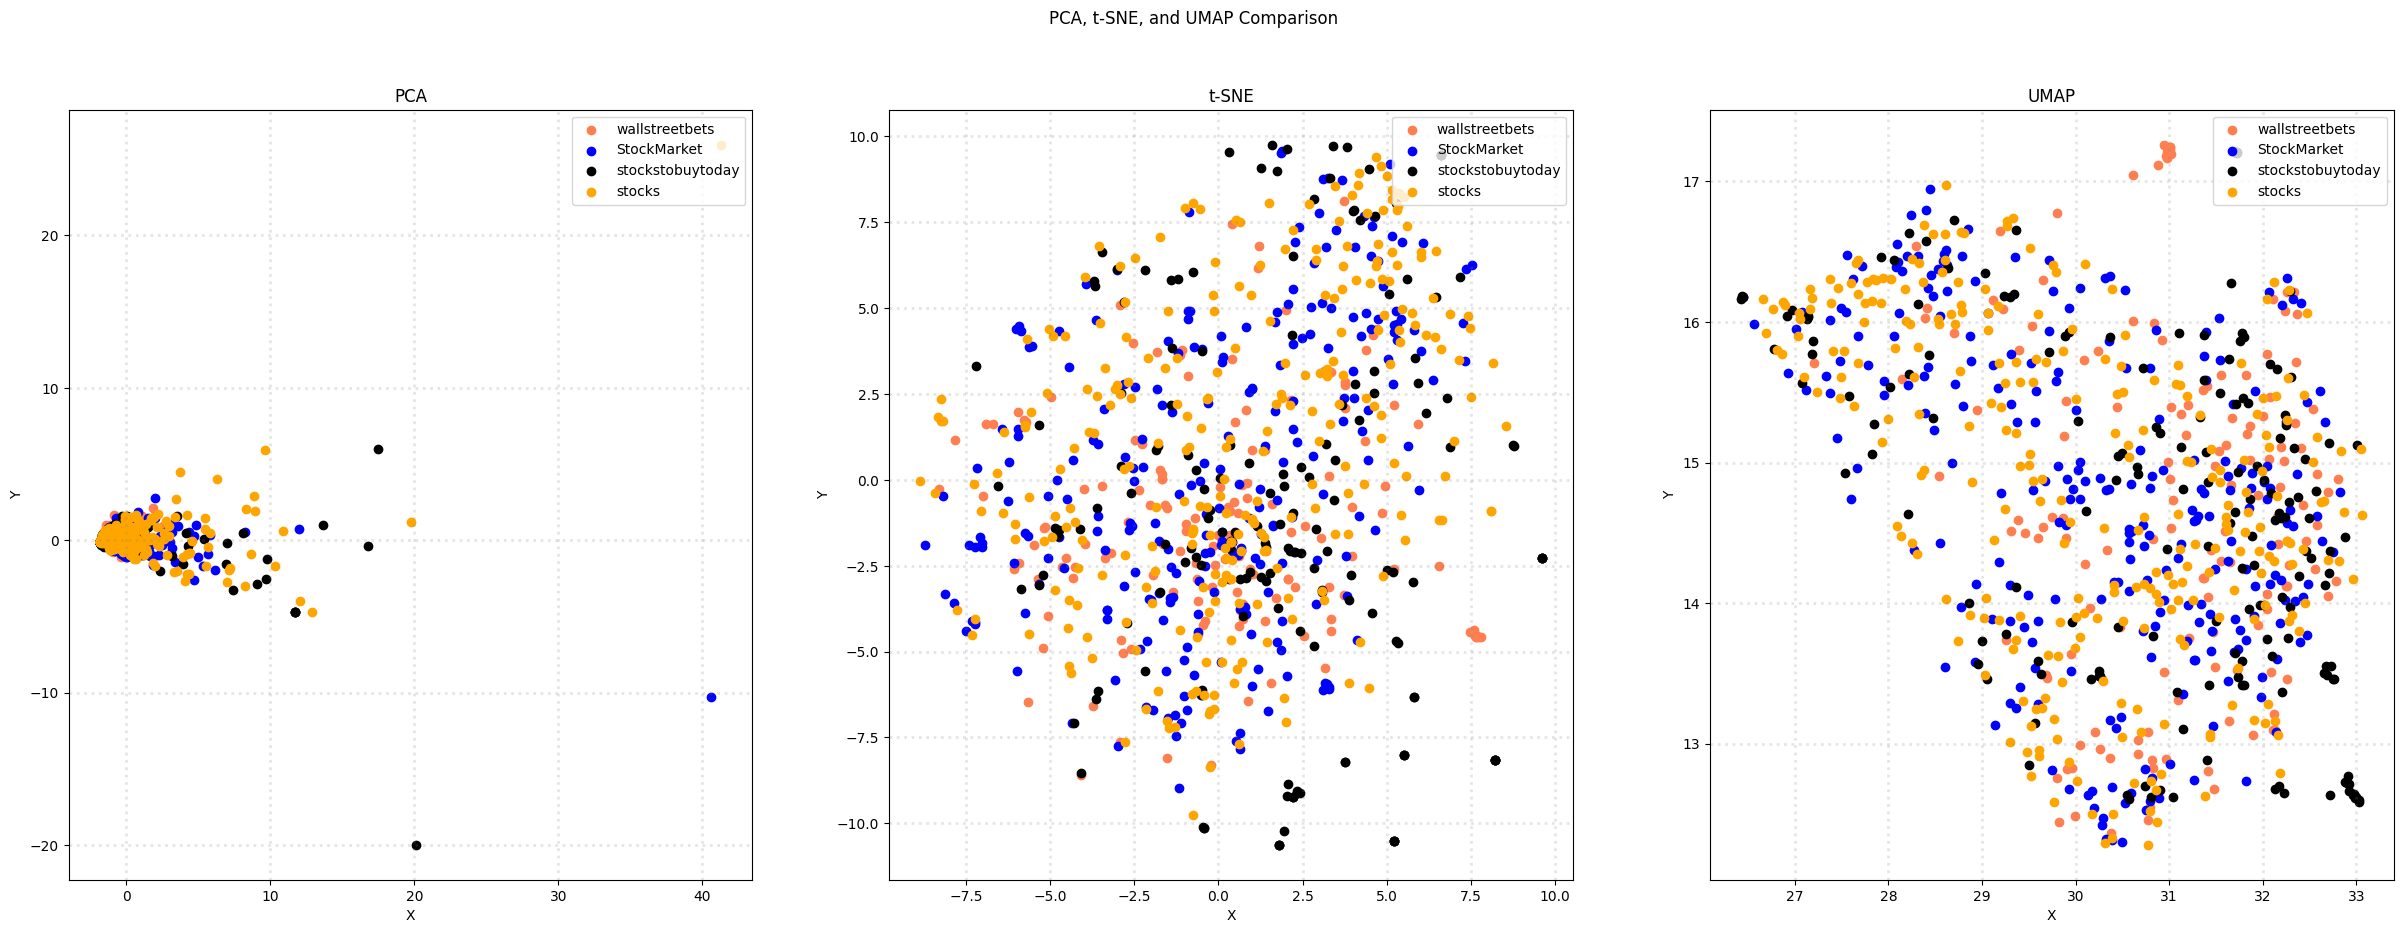

In [30]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)
col = ['coral', 'blue', 'black', 'orange']
categories = X['subreddit'].unique()

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['subreddit'] == category].T[0]
        ys = X_reduced[X['subreddit'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_tdm, 'PCA')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], X_umap_tdm, 'UMAP')

plt.show()

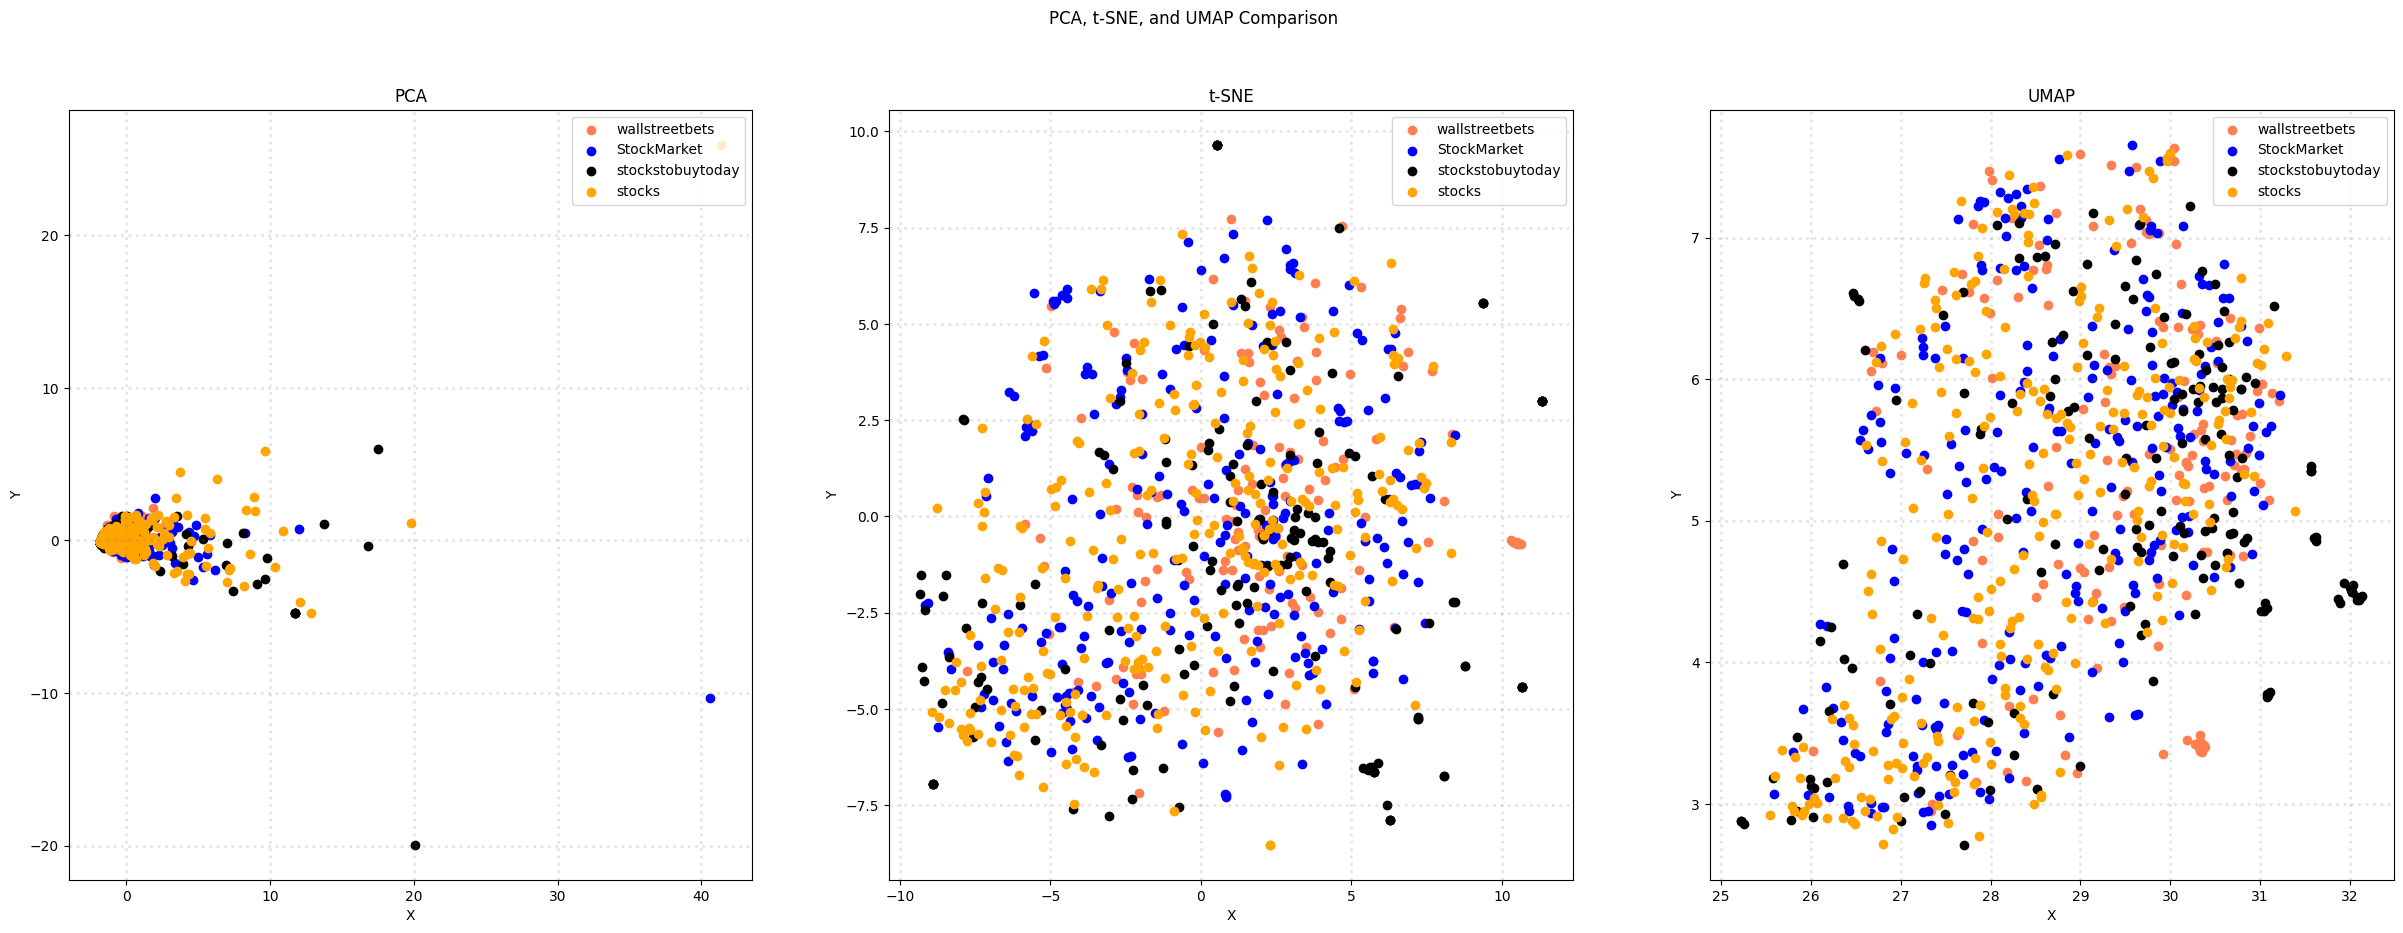

In [31]:
X_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)
col = ['coral', 'blue', 'black', 'orange']
categories = X['subreddit'].unique()

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['subreddit'] == category].T[0]
        ys = X_reduced[X['subreddit'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_aug, 'PCA')
plot_scatter(axes[1], X_tsne_aug, 't-SNE')
plot_scatter(axes[2], X_umap_aug, 'UMAP')

plt.show()

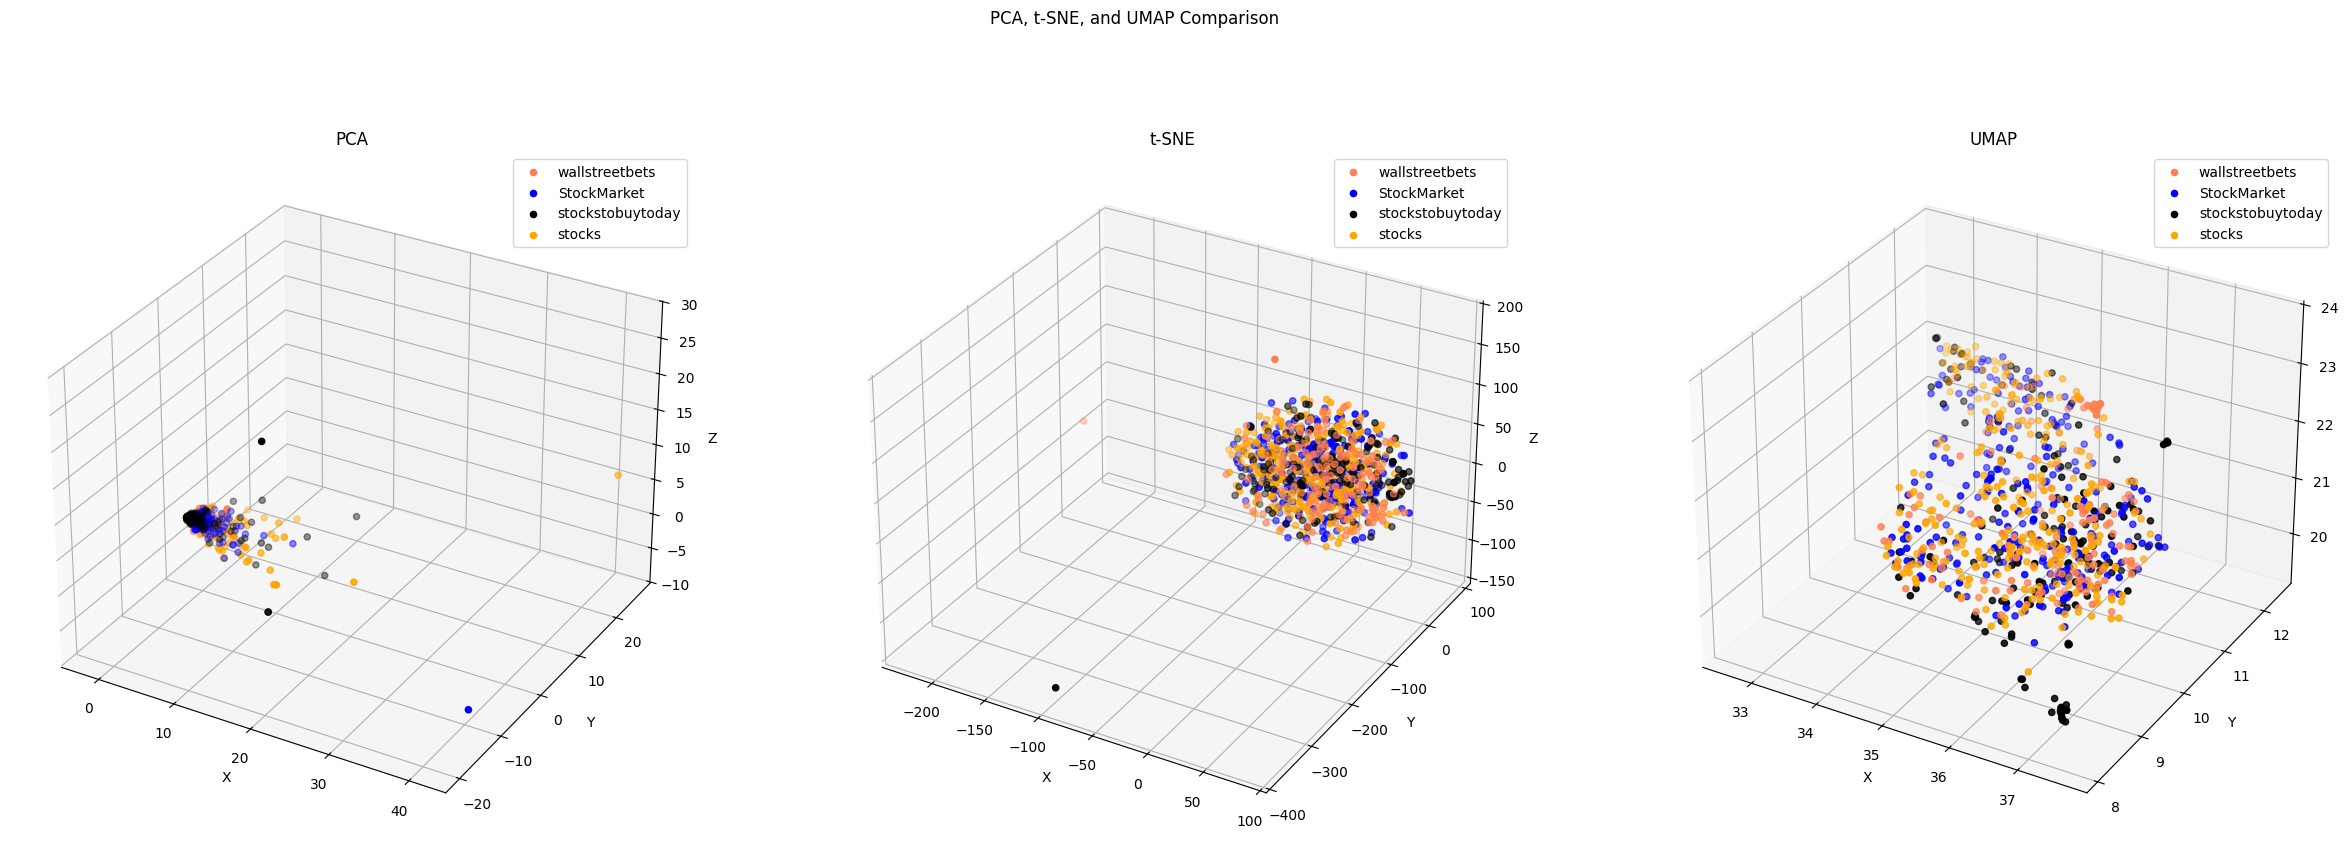

In [32]:
#Answer Here 18
X_pca_3d = PCA(n_components=3).fit_transform(augmented_df.values)
X_tsne_3d = TSNE(n_components=3).fit_transform(augmented_df.values)
X_umap_3d = umap.UMAP(n_components=3).fit_transform(augmented_df.values)

from mpl_toolkits.mplot3d import Axes3D



col = ['coral', 'blue', 'black', 'orange']
categories = X['subreddit'].unique() 
fig = plt.figure(figsize=(30, 10))
# fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')
fig.suptitle('PCA, t-SNE, and UMAP Comparison')
ax = Axes3D(fig, rect=[0, 0, 0.33, 1], elev=30, azim=120)
def plot_scatter_3d(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['subreddit'] == category].T[0]
        ys = X_reduced[X['subreddit'] == category].T[1]
        zs = X_reduced[X['subreddit'] == category].T[2]
        ax.scatter(xs, ys, zs, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z') 
    ax.legend(loc='upper right')


plot_scatter_3d(ax1, X_pca_3d, 'PCA')
plot_scatter_3d(ax2, X_tsne_3d, 't-SNE')
plot_scatter_3d(ax3, X_umap_3d, 'UMAP')

#plt.savefig('my_plot.png', dpi=300, bbox_inches='tight')
plt.show()

In [33]:
#Answer 19
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category)
X['bin_category'] = mlb.transform(X['category']).tolist()
# Answer here
mlb2 = preprocessing.LabelBinarizer()
mlb2.fit(X.subreddit)
X['bin_category_name'] = mlb2.transform(X['subreddit']).tolist()
print(X[0:9][['subreddit','bin_category_name']])

          subreddit bin_category_name
0    wallstreetbets      [0, 0, 0, 1]
1    wallstreetbets      [0, 0, 0, 1]
2       StockMarket      [1, 0, 0, 0]
3  stockstobuytoday      [0, 0, 1, 0]
4       StockMarket      [1, 0, 0, 0]
5    wallstreetbets      [0, 0, 0, 1]
6            stocks      [0, 1, 0, 0]
7    wallstreetbets      [0, 0, 0, 1]
8            stocks      [0, 1, 0, 0]


C:\Users\A2282\AppData\Local\Temp\ipykernel_19516\4072771585.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\A2282\AppData\Local\Temp\ipykernel_19516\4072771585.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [34]:
#Answer 20
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import binarize
dt1 = []
rr1 = X.iloc[25]
rr1 = rr1['text']
dt1.append(rr1)

dt2 = []
rr2 = X.iloc[250]
rr2 = rr2['text']
dt2.append(rr2)

dt3 = []
rr3 = X.iloc[500]
rr3 = rr3['text']
dt3.append(rr3)

vc_1 = count_vect.transform(dt1)
vc_2 = count_vect.transform(dt2)
vc_3 = count_vect.transform(dt3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
vc_1_bin = binarize(vc_1)
vc_2_bin = binarize(vc_2)
vc_3_bin = binarize(vc_3)

css_1_2 = cosine_similarity(vc_1_bin, vc_2_bin, dense_output=True)
css_1_3 = cosine_similarity(vc_1_bin, vc_3_bin, dense_output=True)
css_2_3 = cosine_similarity(vc_2_bin, vc_3_bin, dense_output=True)

css_1_1 = cosine_similarity(vc_1_bin, vc_1_bin, dense_output=True)
css_2_2 = cosine_similarity(vc_2_bin, vc_2_bin, dense_output=True)
css_3_3 = cosine_similarity(vc_3_bin, vc_3_bin, dense_output=True)

print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":css_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":css_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":css_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":css_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":css_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":css_3_3})


Cosine Similarity using count bw 1 and 2: 0.025254
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 2 and 3: 0.105644
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


C:\Users\A2282\AppData\Local\Temp\ipykernel_19516\4201128925.py:36: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\A2282\AppData\Local\Temp\ipykernel_19516\4201128925.py:37: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\A2282\AppData\Local\Temp\ipykernel_19516\4201128925.py:38: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\A2282\AppData\Local\Temp\ipykernel_19516\4201128925.py:40: DeprecationWarning:

Conversion of an array with ndim > 0 t

In [35]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
category_mapping = dict(X[['category', 'subreddit']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, X['category'], test_size=0.3, random_state=42)

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.5529411764705883

Classification Report:
                   precision    recall  f1-score   support

  wallstreetbets     0.6818    0.3191    0.4348        47
     StockMarket     0.5570    0.6111    0.5828        72
stockstobuytoday     0.7826    0.3673    0.5000        49
          stocks     0.4885    0.7356    0.5872        87

        accuracy                         0.5529       255
       macro avg     0.6275    0.5083    0.5262       255
    weighted avg     0.6000    0.5529    0.5411       255



In [36]:
#Answer 21
nb = MultinomialNB()
X_aug_train, X_aug_test, y_aug_train, y_aug_test = train_test_split(augmented_df, X['category'], test_size=0.3, random_state=42)
nb.fit(X_aug_train, y_aug_train)
y_aug_pred = nb.predict(X_aug_test)
print("Accuracy:", accuracy_score(y_aug_test, y_aug_pred))
print("\nClassification Report:\n", classification_report(y_aug_test, y_aug_pred, target_names=target_names, digits=4))

Accuracy: 0.5490196078431373

Classification Report:
                   precision    recall  f1-score   support

  wallstreetbets     0.6818    0.3191    0.4348        47
     StockMarket     0.5422    0.6250    0.5806        72
stockstobuytoday     0.7500    0.3673    0.4932        49
          stocks     0.4921    0.7126    0.5822        87

        accuracy                         0.5490       255
       macro avg     0.6165    0.5060    0.5227       255
    weighted avg     0.5907    0.5490    0.5375       255



In [37]:
# Decision Tree with only the document-term frequency data
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split the data (already done above, but shown here for clarity)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, X['category'], test_size=0.3, random_state=42)

# Train Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_classifier.predict(X_test)
print("Decision Tree Accuracy (TDM):", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt, target_names=target_names, digits=4))

Decision Tree Accuracy (TDM): 0.4392156862745098

Classification Report:
                   precision    recall  f1-score   support

  wallstreetbets     0.3281    0.4468    0.3784        47
     StockMarket     0.4156    0.4444    0.4295        72
stockstobuytoday     0.5581    0.4898    0.5217        49
          stocks     0.4930    0.4023    0.4430        87

        accuracy                         0.4392       255
       macro avg     0.4487    0.4458    0.4432       255
    weighted avg     0.4533    0.4392    0.4424       255



In [38]:
#Answer 24
X_aug_train, X_aug_test, y_aug_train, y_aug_test = train_test_split(augmented_df, X['category'], test_size=0.3, random_state=42)
aug_classifier = DecisionTreeClassifier(random_state=42)
aug_classifier.fit(X_aug_train, y_aug_train)
y_aug_pred = aug_classifier.predict(X_aug_test)
print("Decision Tree Accuracy (TDM):", accuracy_score(y_aug_test, y_aug_pred))
print("\nClassification Report:\n", classification_report(y_aug_test, y_aug_pred, target_names=target_names, digits=4))

Decision Tree Accuracy (TDM): 0.396078431372549

Classification Report:
                   precision    recall  f1-score   support

  wallstreetbets     0.2857    0.4255    0.3419        47
     StockMarket     0.3580    0.4028    0.3791        72
stockstobuytoday     0.5000    0.4694    0.4842        49
          stocks     0.5000    0.3333    0.4000        87

        accuracy                         0.3961       255
       macro avg     0.4109    0.4078    0.4013       255
    weighted avg     0.4204    0.3961    0.3996       255



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import ComplementNB
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

tfidf_vect = TfidfVectorizer()
X_tfidf = tfidf_vect.fit_transform(X['text'])  # Transform the text data into TF-IDF features   
X_tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vect.get_feature_names_out())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf_df, X['category'], test_size=0.2, random_state=42)

# Train a Complement Naive Bayes classifier on the TF-IDF features
nb_tfidf = ComplementNB()
nb_tfidf.fit(X_train, y_train)
y_pred_tfidf = nb_tfidf.predict(X_test)
# Evaluate the classifier
print("TF-IDF Naive Bayes Classifier Accuracy:", accuracy_score(y_test, y_pred_tfidf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tfidf, target_names=target_names, digits=4))

#compare with word frequency NB classifier
nb = MultinomialNB()
X_aug_train, X_aug_test, y_aug_train, y_aug_test = train_test_split(augmented_df, X['category'], test_size=0.3, random_state=42)
nb.fit(X_aug_train, y_aug_train)
y_aug_pred = nb.predict(X_aug_test)
print("word frequency Naive Bayes Classifier Accuracy:", accuracy_score(y_aug_test, y_aug_pred))
print("\nClassification Report:\n", classification_report(y_aug_test, y_aug_pred, target_names=target_names, digits=4))

TF-IDF Naive Bayes Classifier Accuracy: 0.5705882352941176

Classification Report:
                   precision    recall  f1-score   support

  wallstreetbets     0.5417    0.3939    0.4561        33
     StockMarket     0.5741    0.6200    0.5962        50
stockstobuytoday     0.6111    0.4074    0.4889        27
          stocks     0.5676    0.7000    0.6269        60

        accuracy                         0.5706       170
       macro avg     0.5736    0.5303    0.5420       170
    weighted avg     0.5714    0.5706    0.5628       170

word frequency Naive Bayes Classifier Accuracy: 0.5490196078431373

Classification Report:
                   precision    recall  f1-score   support

  wallstreetbets     0.6818    0.3191    0.4348        47
     StockMarket     0.5422    0.6250    0.5806        72
stockstobuytoday     0.7500    0.3673    0.4932        49
          stocks     0.4921    0.7126    0.5822        87

        accuracy                         0.5490       255
       

In [ ]:
#comment 
print("""Word frequency NB is strong when certain words directly indicate the class (e.g., "hate" → negative).
      But it may misclassify if common words dominate but are not discriminative.
      While TF-IDF NB can focus on discriminative words by down-weighting common words.
      It is often more robust for varied-length documents or large vocabularies.""")

In [ ]:
# Fourth part of the assignment
# Answer Here
print("""
Inefficiencies :
- Limited experimentation with different model architectures and hyperparameters.
- Lack of thorough evaluation metrics to assess model performance beyond accuracy.
Improvements :
- Conduct a more detailed exploratory data analysis (EDA) to understand the dataset better.
- Experiment with various text vectorization techniques (e.g., Word2Vec, GloVe) and choose the most suitable one.
- Utilize a wider range of evaluation metrics (e.g., ROC-AUC) to gain deeper insights into model performance.
""")